In [245]:
#-*- coding:utf-8 –*-
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn import model_selection, preprocessing, metrics
import warnings
import datetime
warnings.filterwarnings("ignore")
import os
print(os.listdir("E:\\kaggle\\jia"))

['heating-data-2017-11-25.csv', '图片保存']


In [246]:
df_train = pd.read_csv(r"E:\\kaggle\\jia\\heating-data-2017-11-25.csv")
print("{} observations and {} features in train set.".format(df_train.shape[0],df_train.shape[1]))

9099 observations and 15 features in train set.


In [247]:
df_train.head()

,时间,左阴极电压,左阴极位置,右阴极电压,右阴极位置,中间阳极电压,中间阳极位置,左阴极电流,右阴极电流,中间阳极电流,左阴极气,右阴极气,水压力,水流量,水温度
0,11/25/2017 12:03:27 AM,72.2,0.0,73.9,0.0,155.5,0.0,11.1,9.1,18.2,4.46,3.74,0.81,4.40,15.48
1,11/25/2017 12:03:28 AM,71.6,0.0,73.6,0.0,155.7,0.0,10.1,9.1,18.2,4.46,3.75,0.82,4.40,15.19
2,11/25/2017 12:03:29 AM,71.5,0.0,73.4,0.0,154.5,0.0,10.1,9.1,18.2,4.46,3.75,0.84,4.40,15.19
3,11/25/2017 12:03:30 AM,71.2,0.0,73.6,0.0,154.5,0.0,10.1,9.1,18.2,4.45,3.74,0.83,4.40,15.48
4,11/25/2017 12:03:31 AM,71.0,0.0,73.4,0.0,154.8,0.0,10.1,9.1,18.2,4.45,3.74,0.81,1.09,15.63


In [248]:
#数据可视化分析及中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  
train_x=df_train.drop(['时间'],axis=1)
train_Y=df_train['左阴极电压']

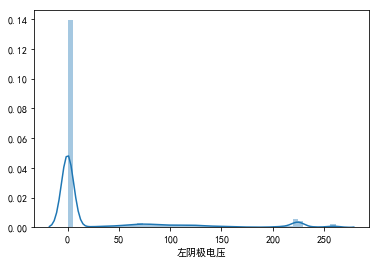

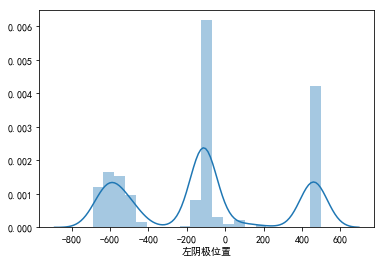

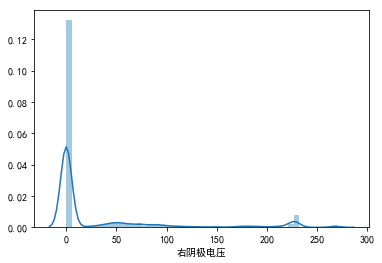

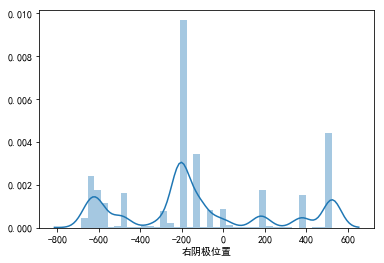

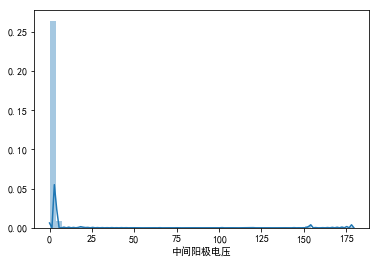

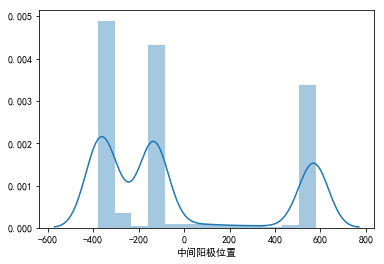

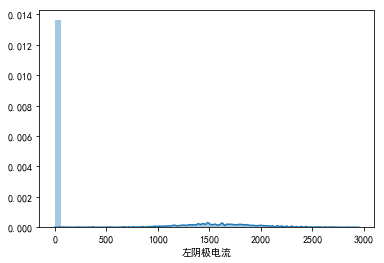

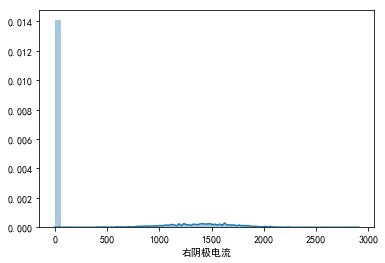

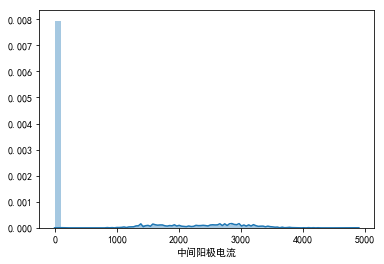

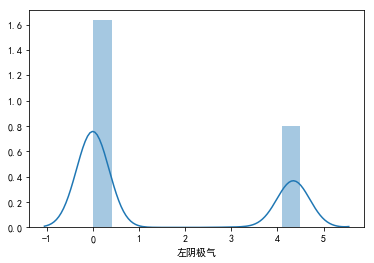

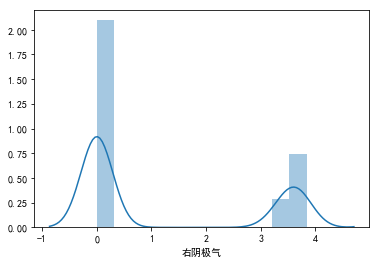

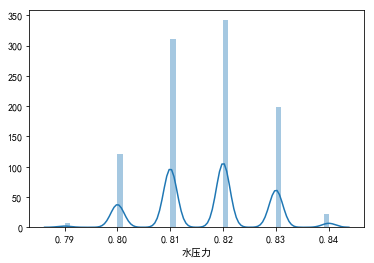

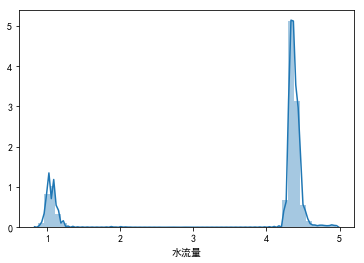

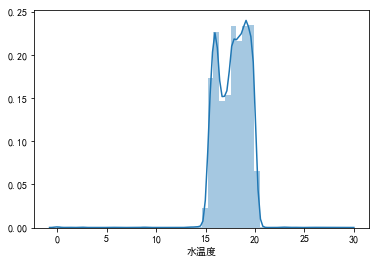

In [249]:
for col in train_x.columns:
    sns.distplot(train_x[col])
    plt.show()

In [250]:
#数据分析
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099 entries, 0 to 9098
Data columns (total 15 columns):
时间        9099 non-null object
左阴极电压     9099 non-null float64
左阴极位置     9099 non-null float64
右阴极电压     9099 non-null float64
右阴极位置     9099 non-null float64
中间阳极电压    9099 non-null float64
中间阳极位置    9099 non-null float64
左阴极电流     9099 non-null float64
右阴极电流     9099 non-null float64
中间阳极电流    9099 non-null float64
左阴极气      9099 non-null float64
右阴极气      9099 non-null float64
水压力       9099 non-null float64
水流量       9099 non-null float64
水温度       9099 non-null float64
dtypes: float64(14), object(1)
memory usage: 1.0+ MB


In [251]:
df_train.describe()

,左阴极电压,左阴极位置,右阴极电压,右阴极位置,中间阳极电压,中间阳极位置,左阴极电流,右阴极电流,中间阳极电流,左阴极气,右阴极气,水压力,水流量,水温度
count,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000
mean,35.800956,-114.606385,34.668062,-128.082295,2.959138,-32.419233,312.721728,253.065117,529.772360,1.438756,1.181594,0.816678,3.733692,17.752595
std,69.178147,386.225522,68.259612,365.905481,19.088374,370.770154,654.935174,553.661093,1041.473773,2.042109,1.687907,0.010125,1.321759,1.526101
min,0.000000,-690.200000,0.000000,-685.900000,0.000000,-379.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.790000,0.870000,0.000000
25%,0.000000,-504.250000,0.000000,-302.900000,0.000000,-336.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.810000,4.290000,16.490000
50%,0.000000,-106.900000,0.000000,-207.600000,0.000000,-135.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.820000,4.350000,17.940000
75%,46.400000,97.800000,43.900000,35.950000,0.000000,488.750000,10.100000,9.100000,18.200000,4.310000,3.440000,0.820000,4.400000,18.950000
max,261.400000,497.800000,269.700000,523.900000,179.500000,579.000000,2946.000000,2904.500000,4899.600000,4.500000,3.840000,0.840000,4.950000,29.220000


In [252]:
#异常数据处理（删除左及右电流小于20A的数据）
df_train = df_train[df_train['左阴极电流']>20]
df_train = df_train[df_train['右阴极电流']>20]

In [253]:
df_train.describe()

,左阴极电压,左阴极位置,右阴极电压,右阴极位置,中间阳极电压,中间阳极位置,左阴极电流,右阴极电流,中间阳极电流,左阴极气,右阴极气,水压力,水流量,水温度
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,90.402857,-614.897003,59.818606,-627.127526,2.881533,-370.857491,1563.084948,1336.853380,2690.477491,4.328105,3.646871,0.813247,3.411645,19.036592
std,41.535004,30.663577,30.112738,23.791069,0.860808,18.973830,448.085314,340.995288,541.127885,0.033962,0.043326,0.009369,1.511237,1.145546
min,0.000000,-659.400000,0.300000,-685.900000,0.000000,-379.800000,20.300000,42.500000,848.700000,4.240000,3.440000,0.790000,0.870000,1.160000
25%,61.400000,-643.500000,42.400000,-646.900000,2.500000,-379.800000,1301.900000,1115.500000,2359.700000,4.300000,3.620000,0.810000,1.200000,18.950000
50%,88.400000,-612.200000,55.600000,-622.600000,3.000000,-379.800000,1564.700000,1352.000000,2738.400000,4.320000,3.640000,0.810000,4.350000,19.240000
75%,118.550000,-590.200000,77.350000,-616.100000,3.500000,-379.800000,1835.100000,1556.600000,3060.500000,4.350000,3.680000,0.820000,4.440000,19.680000
max,233.500000,-535.500000,193.100000,-565.200000,17.100000,-266.100000,2946.000000,2904.500000,4899.600000,4.420000,3.730000,0.840000,4.950000,29.220000


In [254]:
df_trainY = df_train['左阴极电压']
df_trainx = df_train.drop(['左阴极电压'],axis=1)
df_trainx = df_trainx.drop(['时间'],axis=1)

In [255]:
print(df_trainx.shape)
print(df_trainY.shape)

(1435, 13)
(1435,)


In [256]:
df_trainx.head()

,左阴极位置,右阴极电压,右阴极位置,中间阳极电压,中间阳极位置,左阴极电流,右阴极电流,中间阳极电流,左阴极气,右阴极气,水压力,水流量,水温度
244,-535.5,37.5,-600.6,1.3,-266.1,133.7,1390.5,1626.4,4.37,3.71,0.82,4.33,15.48
248,-535.5,0.7,-618.3,17.1,-266.1,699.8,1460.4,1585.9,4.37,3.71,0.82,4.33,15.19
269,-560.5,50.2,-584.5,2.9,-318.3,1386.4,977.3,2179.4,4.38,3.63,0.83,4.40,15.48
270,-560.7,51.2,-584.5,2.2,-318.3,1408.7,883.1,1687.2,4.39,3.65,0.82,4.33,15.19
271,-560.9,49.2,-584.5,2.3,-318.3,1997.1,829.4,1899.9,4.39,3.64,0.82,4.31,15.34


In [257]:
#lightBGM参数设置

In [258]:
param = {'num_leaves': 15,
         'min_data_in_leaf': 6, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.005,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         'lambda_l1': 1.2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1,#0.1
         "verbosity": -1}


In [259]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(df_trainx))
predictions = np.zeros(len(df_trainY))

In [260]:
df_train = df_trainx
target = df_trainY

In [261]:
use_cols = [c for c in df_train.columns]
features = list(df_train[use_cols].columns)

df_train[features].head()

,左阴极位置,右阴极电压,右阴极位置,中间阳极电压,中间阳极位置,左阴极电流,右阴极电流,中间阳极电流,左阴极气,右阴极气,水压力,水流量,水温度
244,-535.5,37.5,-600.6,1.3,-266.1,133.7,1390.5,1626.4,4.37,3.71,0.82,4.33,15.48
248,-535.5,0.7,-618.3,17.1,-266.1,699.8,1460.4,1585.9,4.37,3.71,0.82,4.33,15.19
269,-560.5,50.2,-584.5,2.9,-318.3,1386.4,977.3,2179.4,4.38,3.63,0.83,4.40,15.48
270,-560.7,51.2,-584.5,2.2,-318.3,1408.7,883.1,1687.2,4.39,3.65,0.82,4.33,15.19
271,-560.9,49.2,-584.5,2.3,-318.3,1997.1,829.4,1899.9,4.39,3.64,0.82,4.31,15.34


In [262]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, target.values)):
    print('-')
    print("Fold {}".format(fold_ + 1))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 5000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds=100)
    

-
Fold 1
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 32.7072	valid_1's rmse: 32.6121
[200]	training's rmse: 27.6779	valid_1's rmse: 28.7773
[300]	training's rmse: 24.7559	valid_1's rmse: 26.8599
[400]	training's rmse: 22.8927	valid_1's rmse: 25.8168
[500]	training's rmse: 21.5761	valid_1's rmse: 25.2503
[600]	training's rmse: 20.5793	valid_1's rmse: 24.8996
[700]	training's rmse: 19.7824	valid_1's rmse: 24.7037
[800]	training's rmse: 19.0919	valid_1's rmse: 24.5601
[900]	training's rmse: 18.4687	valid_1's rmse: 24.4868
[1000]	training's rmse: 17.9244	valid_1's rmse: 24.4197
[1100]	training's rmse: 17.3974	valid_1's rmse: 24.3773
[1200]	training's rmse: 16.9402	valid_1's rmse: 24.3487
[1300]	training's rmse: 16.5112	valid_1's rmse: 24.3478
[1400]	training's rmse: 16.0969	valid_1's rmse: 24.3276
[1500]	training's rmse: 15.71	valid_1's rmse: 24.3172
[1600]	training's rmse: 15.3369	valid_1's rmse: 24.3159
Early stopping, best iteration is:
[1550]	t

In [263]:
#oof[val_idx] = clf.predict(df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
   # predictions += clf.predict(df_test[features], num_iteration=clf.best_iteration) / folds.n_splits

In [264]:
#from sklearn.metrics import mean_squared_error
#val_score = np.sqrt(mean_squared_error(target, oof))
#val_score

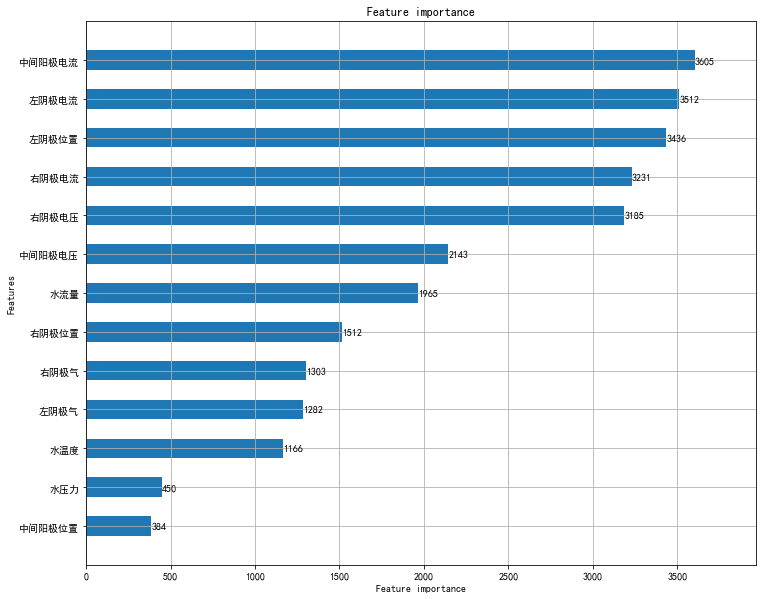

In [265]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(clf, max_num_features=30, height=0.5, ax=ax, title='Feature importance', xlabel='Feature importance', ylabel='Features')
plt.savefig('E:\\kaggle\\jia\\图片保存\\lgb.png')
plt.show()

In [266]:
sorted(list(zip(clf.feature_importance(), features)), reverse=True)

[(3605, '中间阳极电流'),
 (3512, '左阴极电流'),
 (3436, '左阴极位置'),
 (3231, '右阴极电流'),
 (3185, '右阴极电压'),
 (2143, '中间阳极电压'),
 (1965, '水流量'),
 (1512, '右阴极位置'),
 (1303, '右阴极气'),
 (1282, '左阴极气'),
 (1166, '水温度'),
 (450, '水压力'),
 (384, '中间阳极位置')]

In [267]:
#df_sub = pd.DataFrame(df_test.values)
#df_sub["target"] = predictions
#df_sub.to_csv("E:\kaggle\zengqisai\\sub_val_{}.csv".format(val_score), index=False)

In [268]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [269]:
svr = make_pipeline( SVR(kernel='linear'))

In [270]:
import xgboost as xgb

In [271]:
df_trainY = df_trainY
df_trainX = df_trainx

In [272]:
print(df_trainY.shape)
print(df_trainX.shape)

(1435,)
(1435, 13)


In [273]:
#model_xgb = xgb.XGBRegressor(booster='gbtree',colsample_bytree=0.8, gamma=0.1, 
                    #learning_rate=0.02, max_depth=5, 
                            # n_estimators=500,min_child_weight=0.8,
                            # reg_alpha=0, reg_lambda=1,
                             #subsample=0.8, silent=1,
                            # random_state =42, nthread = 2)


In [274]:
from sklearn.model_selection import train_test_split as tts
Trn_x,val_x,Trn_y,val_y = tts(df_trainX,df_trainY,test_size =0.1,random_state = 7)
trn_x , test_x, trn_y, test_y = tts(Trn_x , Trn_y, test_size =0.1, random_state = 7)

In [275]:
# converting into xgb DMatrix
Train = xgb.DMatrix(trn_x,label = trn_y)
Validation = xgb.DMatrix(val_x, label = val_y)
Test = xgb.DMatrix(test_x)

In [276]:
params = {"booster":"gbtree","eta":0.1,'min_split_loss':0,'max_depth':5,
         'min_child_weight':1, 'max_delta_step':0,'subsample':1,'colsample_bytree':1,
         'colsample_bylevel':1,'reg_lambda':1,'reg_alpha':0,
         'grow_policy':'depthwise','max_leaves':0,'objective':'reg:linear','eval_metric':'rmse',
         'seed':7,'lambda':0.1}
history ={}  # This will record rmse score of training and test set
eval_list =[(Train,"Training"),(Validation,"Validation")]

In [277]:
clf = xgb.train(params, Train, num_boost_round=5000, evals=eval_list, obj=None, feval=None, maximize=False, 
          early_stopping_rounds=40, evals_result=history)

[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[0]	Training-rmse:89.856	Validation-rmse:90.3946
Multiple eval metrics have been passed: 'Validation-rmse' will be used for early stopping.

Will train until Validation-rmse hasn't improved in 40 rounds.
[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[1]	Training-rmse:81.7485	Validation-rmse:82.2498
[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[2]	Training-rmse:74.506	Validation-rmse:75.1063
[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[3]	Training-rmse:68.04	Validation-rmse:68.6472
[09:26:53] C:\Users\Administrator\Desktop\xgb

[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[40]	Training-rmse:17.131	Validation-rmse:25.5762
[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[41]	Training-rmse:17.0517	Validation-rmse:25.5489
[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[42]	Training-rmse:16.9263	Validation-rmse:25.4992
[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[43]	Training-rmse:16.8274	Validation-rmse:25.464
[09:26:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[44]	Training-rmse:16.7331	Validation-rmse:

[09:26:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[81]	Training-rmse:13.9044	Validation-rmse:25.6757
[09:26:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[82]	Training-rmse:13.8788	Validation-rmse:25.6723
[09:26:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[83]	Training-rmse:13.7635	Validation-rmse:25.6081
[09:26:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[84]	Training-rmse:13.7328	Validation-rmse:25.6297
[09:26:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[85]	Training-rmse:13.6452	Validation-rms

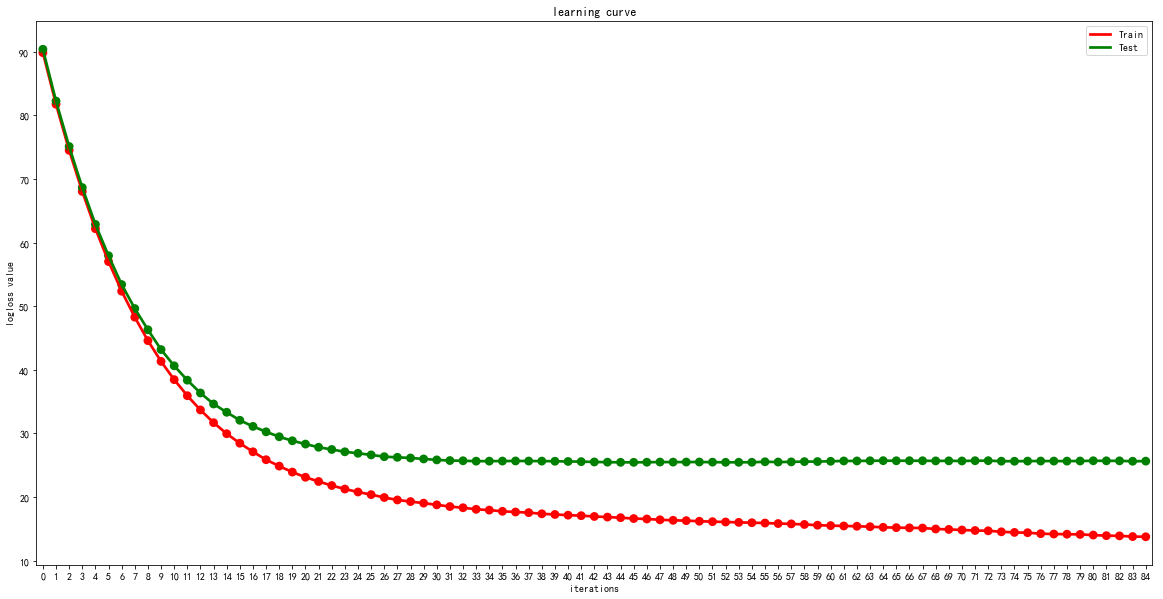

In [278]:
# dataframe of progress
f,ax=plt.subplots(1,1)
f.set_figheight(10)
f.set_figwidth(20)
df_performance=pd.DataFrame({"train":history["Training"]["rmse"],"test":history["Validation"]["rmse"]}).reset_index(drop=False)
sns.pointplot(ax=ax,y="train",x="index",data=df_performance,color="r")
sns.pointplot(ax=ax,y="test",x="index",data=df_performance,color="g")
ax.legend(handles=ax.lines[::len(df_performance)+1], labels=["Train","Test"])
plt.xlabel('iterations'); plt.ylabel('logloss value'); plt.title('learning curve')
plt.savefig('E:\kaggle\jia\图片保存')

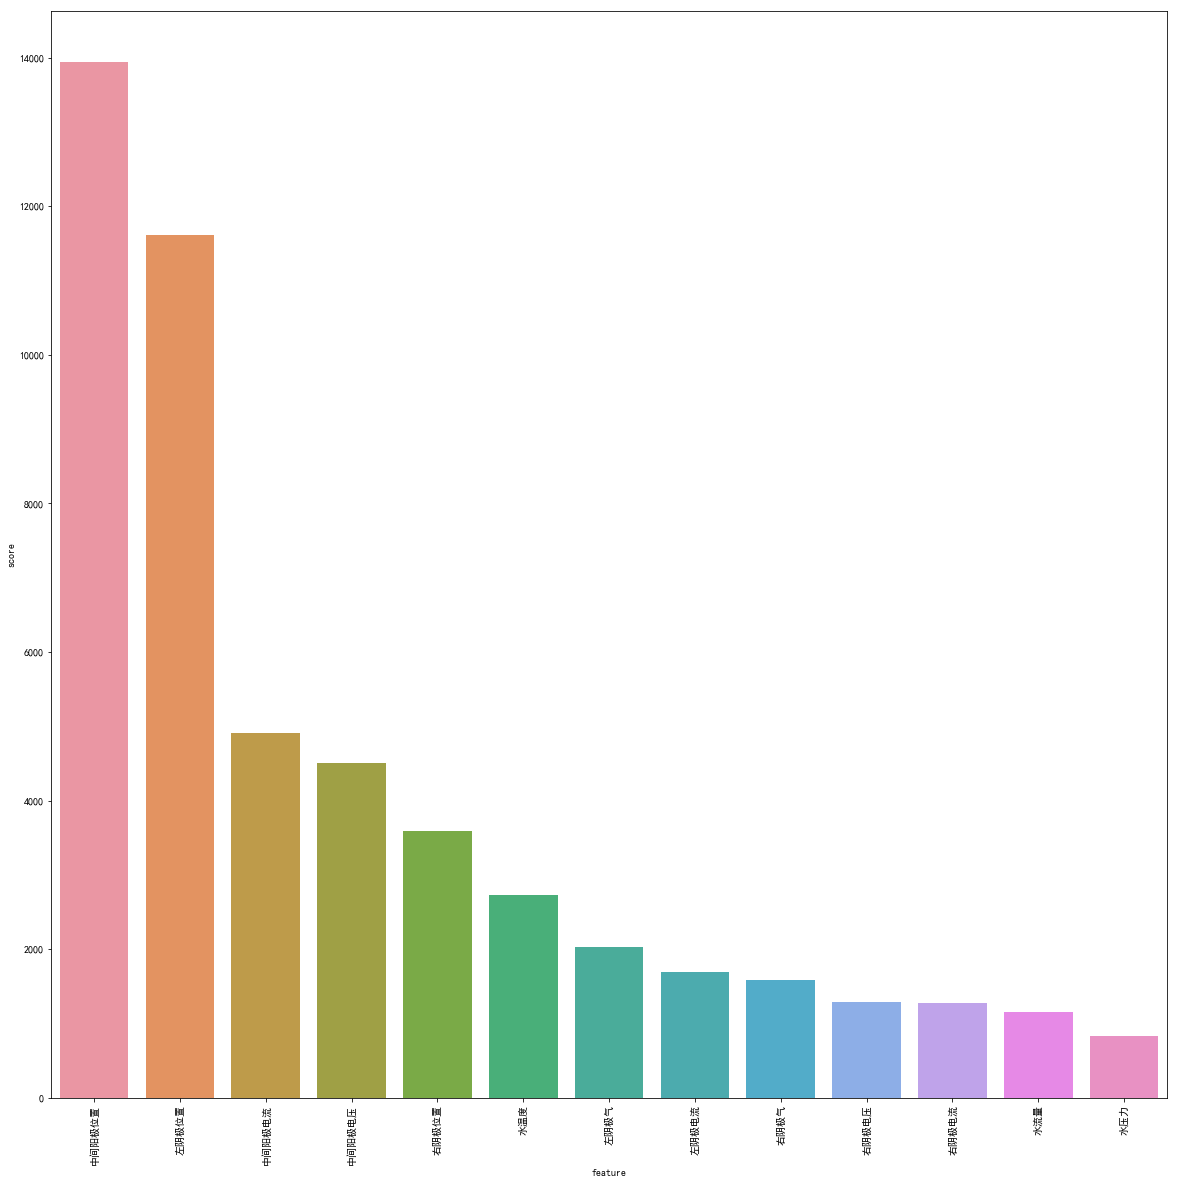

In [279]:
score=clf.get_score(importance_type="gain")
df=pd.DataFrame({"feature":list(score.keys()),"score":list(score.values())})
df=df.sort_values(by="score",ascending=False)
plt.figure(figsize=(20,20))
plt.xticks(rotation="vertical")
sns.barplot(x="feature",y="score",data=df,orient="v")
plt.savefig('E:\\kaggle\\jia\\图片保存\\xgb.png')

In [280]:
# Checking rmse on test set (kept during data splitting)
#from sklearn.metrics import mean_squared_error as mse
#pred_test = clf.predict(Test)
#print(np.sqrt(score))

In [281]:
#模型数据保存